# Exploring the network of managers

In [0]:
# Load packages

import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

In [0]:
# Loading up the data
# Note, that the data is space-separated and very "raw"
# also need to skip the header and cut off the first column

attributes = pd.read_csv('https://github.com/SDS-AAU/M2-2018/raw/master/assignments/assignment_1/data/Krack-High-Tec-Attributes.csv')
attributes.columns = [column.lower() for column in attributes.columns]

el_advice = pd.read_csv('https://github.com/SDS-AAU/M2-2018/raw/master/assignments/assignment_1/data/Krack-High-Tec-edgelist-Advice.txt', sep=' ', header = None)
el_advice = el_advice.iloc[:,1:]
el_advice.columns = ['ego', 'alter', 'advice_tie']

el_friendship = pd.read_csv('https://github.com/SDS-AAU/M2-2018/raw/master/assignments/assignment_1/data/Krack-High-Tec-edgelist-Friendship.txt', sep=' ', header = None)
el_friendship = el_friendship.iloc[:,1:]
el_friendship.columns = ['ego', 'alter', 'friendship_tie']

el_reports = pd.read_csv('https://github.com/SDS-AAU/M2-2018/raw/master/assignments/assignment_1/data/Krack-High-Tec-edgelist-ReportsTo.txt', sep=' ', header = None)
el_reports = el_reports.iloc[:,1:]
el_reports.columns = ['ego', 'alter', 'reports_tie']

In [68]:
print(el_advice.head())
print(el_friendship.head())
print(el_reports.head())
print(attributes.head())

   ego  alter  advice_tie
0    1      1           0
1    1      2           1
2    1      3           0
3    1      4           1
4    1      5           0
   ego  alter  friendship_tie
0    1      1               0
1    1      2               1
2    1      3               0
3    1      4               1
4    1      5               0
   ego  alter  reports_tie
0    1      1            0
1    1      2            1
2    1      3            0
3    1      4            0
4    1      5            0
   id  age  tenure  level  dept
0   1   33   9.333      3     4
1   2   42  19.583      2     4
2   3   40  12.750      3     2
3   4   33   7.500      3     4
4   5   32   3.333      3     2


In [0]:
# Create directed graph
G = nx.DiGraph()

In [0]:
# Filter for those entries where a specific tie exists (subset of pandas DF)
el_reports_1 = el_reports[el_reports.reports_tie == 1]

# Growing graph by adding edges (as a list of tuple --> zip 2 columns of the DF), adding arguments/labels is very open in networkx,
# thats why we can just write reports_tie as an argument and set it to 1
# some edges will have more than one type of tie

G.add_edges_from(zip(el_reports_1.ego, el_reports_1.alter), reports_tie=1)

# and the same below 2 more times for the other graphs

In [0]:
el_advice_1 = ------
G.add_edges_from(zip(------), advice_tie=1)

In [79]:
# Setting the node attributes

# Setting the index as id
attributes.set_index('id', inplace=True)

# Creating a dictionary from the Dataframe transponse that we can pass as note attributes for our graph
attributes_dict = attributes.T.to_dict()

# Setting node attributes
nx.set_node_attributes(G, attributes_dict)

{1: {'age': 33.0, 'dept': 4.0, 'level': 3.0, 'tenure': 9.333},
 2: {'age': 42.0, 'dept': 4.0, 'level': 2.0, 'tenure': 19.583},
 3: {'age': 40.0, 'dept': 2.0, 'level': 3.0, 'tenure': 12.75},
 4: {'age': 33.0, 'dept': 4.0, 'level': 3.0, 'tenure': 7.5},
 5: {'age': 32.0, 'dept': 2.0, 'level': 3.0, 'tenure': 3.333},
 6: {'age': 59.0, 'dept': 1.0, 'level': 3.0, 'tenure': 28.0},
 7: {'age': 55.0, 'dept': 0.0, 'level': 1.0, 'tenure': 30.0},
 8: {'age': 34.0, 'dept': 1.0, 'level': 3.0, 'tenure': 11.333},
 9: {'age': 62.0, 'dept': 2.0, 'level': 3.0, 'tenure': 5.417000000000001},
 10: {'age': 37.0, 'dept': 3.0, 'level': 3.0, 'tenure': 9.25},
 11: {'age': 46.0, 'dept': 3.0, 'level': 3.0, 'tenure': 27.0},
 12: {'age': 34.0, 'dept': 1.0, 'level': 3.0, 'tenure': 8.917},
 13: {'age': 48.0, 'dept': 2.0, 'level': 3.0, 'tenure': 0.25},
 14: {'age': 43.0, 'dept': 2.0, 'level': 2.0, 'tenure': 10.417},
 15: {'age': 40.0, 'dept': 2.0, 'level': 3.0, 'tenure': 8.417},
 16: {'age': 27.0, 'dept': 4.0, 'level': 

In [60]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 21
Number of edges: 232
Average in degree:  11.0476
Average out degree:  11.0476


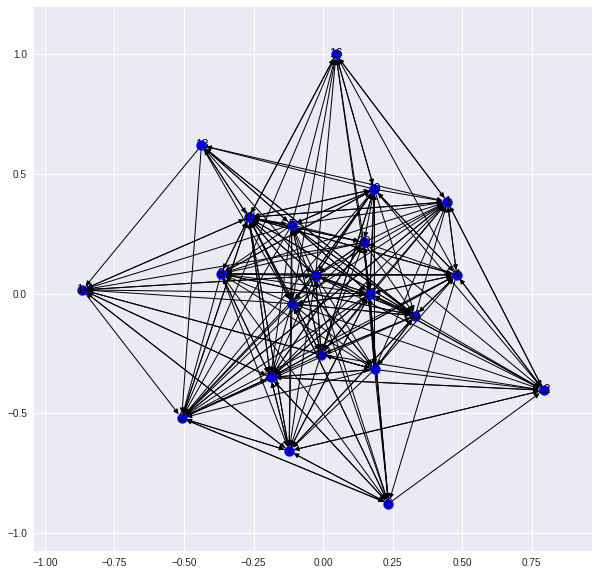

In [65]:
# A not too pretty first viz (of the full Graph with all edges imported)
plt.figure(figsize=(10, 10))
pos=nx.spring_layout(G, k=0.15)
nx.draw_networkx(G,pos,node_size=100, node_color='blue')
plt.show()